# Meta Methods applied to the Patient Survival Prediction Dataset

In [4]:
# Import libraries 

import numpy as np    # Numeric and matrix computation
import pandas as pd   # Optional: good package for manipulating data 
import sklearn as sk  # Package with learning algorithms implemented
from sklearn import preprocessing

df = pd.read_csv("dataset_preprocessed.csv")
data_without_outliers = df.iloc[:, 1:]

df.head()
df.info()
df.describe()

nan_value = float("NaN")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26691 entries, 0 to 26690
Data columns (total 81 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   hospital_id                    26691 non-null  int64  
 1   age                            26691 non-null  float64
 2   bmi                            26691 non-null  float64
 3   elective_surgery               26691 non-null  bool   
 4   ethnicity                      26208 non-null  object 
 5   gender                         26676 non-null  object 
 6   height                         26691 non-null  float64
 7   icu_admit_source               26650 non-null  object 
 8   icu_id                         26691 non-null  int64  
 9   icu_stay_type                  26691 non-null  object 
 10  icu_type                       26691 non-null  object 
 11  pre_icu_los_days               26691 non-null  float64
 12  weight                         26691 non-null 

In [5]:
# Separate data from labels

y = df['hospital_death']
X = df.drop(["hospital_death","ethnicity","icu_admit_source","icu_stay_type","icu_type","apache_3j_bodysystem","apache_2_bodysystem"], axis=1)
X = pd.get_dummies(X)
X = sk.preprocessing.normalize(X)
print(y)
print(X)


0        False
1        False
2         True
3        False
4        False
         ...  
26686     True
26687    False
26688    False
26689    False
26690    False
Name: hospital_death, Length: 26691, dtype: bool
[[0.12187623 0.02582124 0.03299954 ... 0.         0.00103285 0.        ]
 [0.03653586 0.0210358  0.02950474 ... 0.         0.         0.00110715]
 [0.15847877 0.06043682 0.03688919 ... 0.         0.         0.00134304]
 ...
 [0.0268194  0.07598831 0.02243133 ... 0.         0.         0.00089398]
 [0.15916393 0.05427101 0.02951362 ... 0.00086975 0.00086975 0.        ]
 [0.05864054 0.05544066 0.02069965 ... 0.         0.00088849 0.        ]]


## Voting scheme

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

(x_train, x_test, y_train, y_test) = train_test_split(X, y, test_size = 0.3, random_state = 1)
cv=10

clf1 = GaussianNB()
clf2 = KNeighborsClassifier(n_neighbors=9,weights='distance').fit(x_train, y_train)
clf3 = DecisionTreeClassifier(criterion='entropy').fit(x_train, y_train)


#for clf, label in zip([clf1, clf2, clf3], ['Naive Bayes','Knn (3)', 'Dec. Tree', ]):
#    scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
#    print("Accuracy: %0.3f [%s]" % (scores.mean(), label))
    

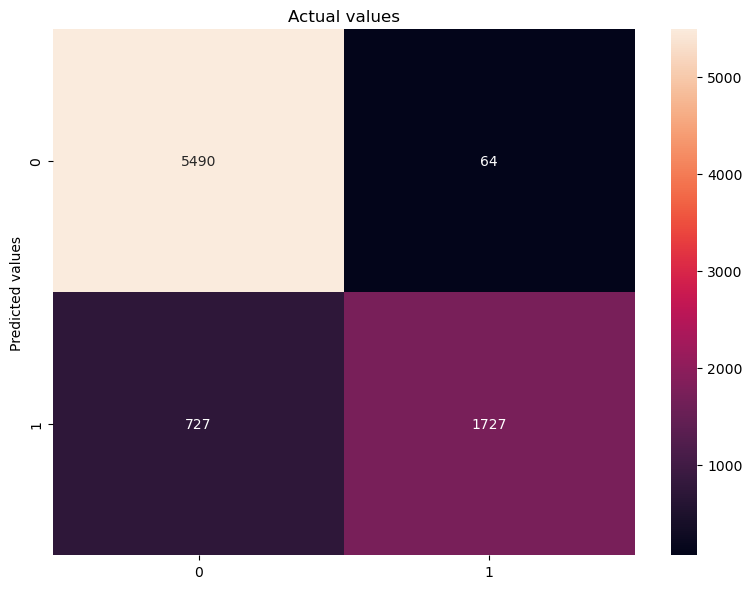

0.9012237762237763
              precision    recall  f1-score   support

       False       0.88      0.99      0.93      5554
        True       0.96      0.70      0.81      2454

    accuracy                           0.90      8008
   macro avg       0.92      0.85      0.87      8008
weighted avg       0.91      0.90      0.90      8008

Accuracy: 0.901 [Majority Voting]


In [135]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), (
    'dt', clf3)], voting='hard')

eclf.fit(x_train, y_train)
eclf_prediction = eclf.predict(x_test);

#Confusion matrix
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test,eclf_prediction),annot = True,  fmt = ".0f")
plt.title("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()
print(accuracy_score(y_test, eclf_prediction))
print(classification_report(y_test, eclf_prediction))

scores = cross_val_score(eclf, X, y, cv=cv, scoring='accuracy')
print("Accuracy: %0.3f [%s]" % (scores.mean() , "Majority Voting"))


## Bagging

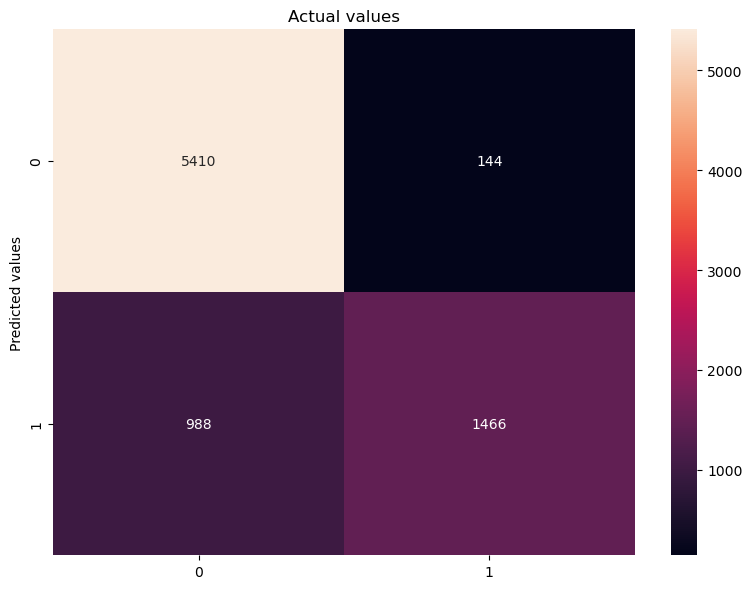

0.8586413586413586
              precision    recall  f1-score   support

       False       0.85      0.97      0.91      5554
        True       0.91      0.60      0.72      2454

    accuracy                           0.86      8008
   macro avg       0.88      0.79      0.81      8008
weighted avg       0.87      0.86      0.85      8008



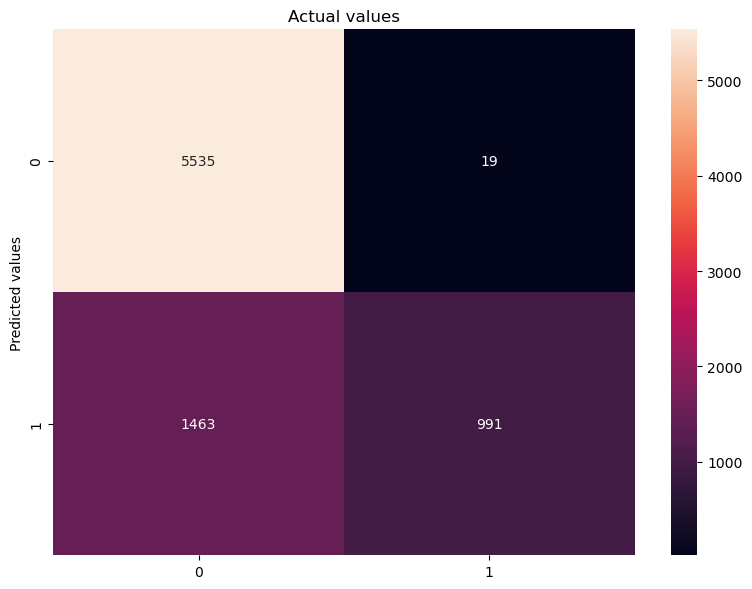

0.814935064935065
              precision    recall  f1-score   support

       False       0.79      1.00      0.88      5554
        True       0.98      0.40      0.57      2454

    accuracy                           0.81      8008
   macro avg       0.89      0.70      0.73      8008
weighted avg       0.85      0.81      0.79      8008



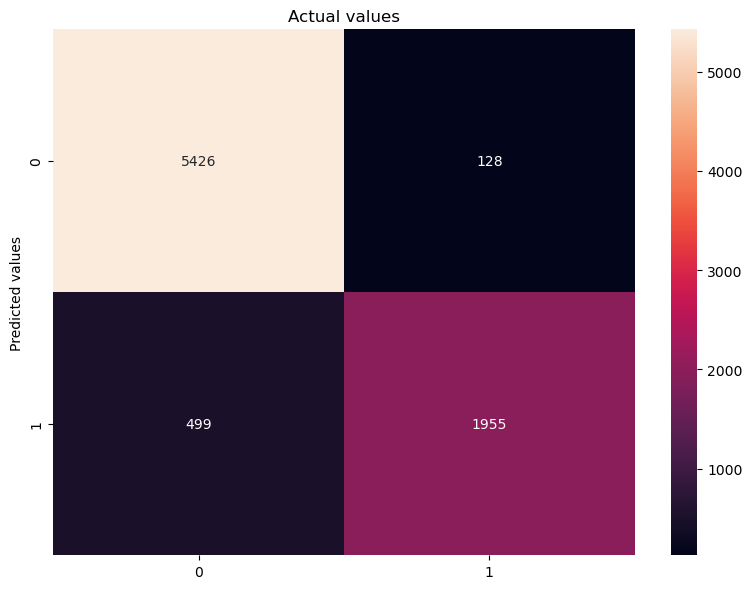

0.9217032967032966
              precision    recall  f1-score   support

       False       0.92      0.98      0.95      5554
        True       0.94      0.80      0.86      2454

    accuracy                           0.92      8008
   macro avg       0.93      0.89      0.90      8008
weighted avg       0.92      0.92      0.92      8008

Accuracy: 0.876 [1]
Accuracy: 0.876 [2]
Accuracy: 0.877 [5]
Accuracy: 0.875 [10]
Accuracy: 0.876 [20]
Accuracy: 0.876 [50]
Accuracy: 0.876 [100]
Accuracy: 0.876 [200]

Accuracy: 0.777 [1]
Accuracy: 0.796 [2]
Accuracy: 0.810 [5]
Accuracy: 0.810 [10]
Accuracy: 0.812 [20]
Accuracy: 0.814 [50]


In [124]:
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#NaiveBayes

clf1 = GaussianNB();
clf1_bagging = BaggingClassifier(base_estimator=clf1,max_features=0.35,n_estimators=100).fit(x_train, y_train)
clf1_prediction = clf1_bagging.predict(x_test);

#Confusion matrix
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test,clf1_prediction),annot = True,  fmt = ".0f")
plt.title("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()
print(accuracy_score(y_test, clf1_prediction))
print(classification_report(y_test, clf1_prediction))

#KNN

clf2 = KNeighborsClassifier(n_neighbors=9,weights="distance");
clf2_bagging = BaggingClassifier(base_estimator=clf2,max_features=0.35,n_estimators=100).fit(x_train, y_train)
clf2_prediction = clf2_bagging.predict(x_test);

#Confusion matrix
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test,clf2_prediction),annot = True,  fmt = ".0f")
plt.title("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()
print(accuracy_score(y_test, clf2_prediction))
print(classification_report(y_test, clf2_prediction))

#Decision Tree

clf3 = DecisionTreeClassifier();
clf3_bagging = BaggingClassifier(base_estimator=clf3,max_features=0.35,n_estimators=100).fit(x_train, y_train)
clf3_prediction = clf3_bagging.predict(x_test);

#Confusion matrix
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test,clf3_prediction),annot = True,  fmt = ".0f")
plt.title("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()
print(accuracy_score(y_test, clf3_prediction))
print(classification_report(y_test, clf3_prediction))


#Naïve Bayes
lb=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(BaggingClassifier(base_estimator=GaussianNB(),n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lb.append(scores.mean())

#KNN
lb2=[]    
print()
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(BaggingClassifier(base_estimator=clf2,n_estimators=nest,max_features=0.35), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lb2.append(scores.mean())

#Decision Tree
lb3=[]    
print()
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=nest,max_features=0.35), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lb3.append(scores.mean())


## Random Forest

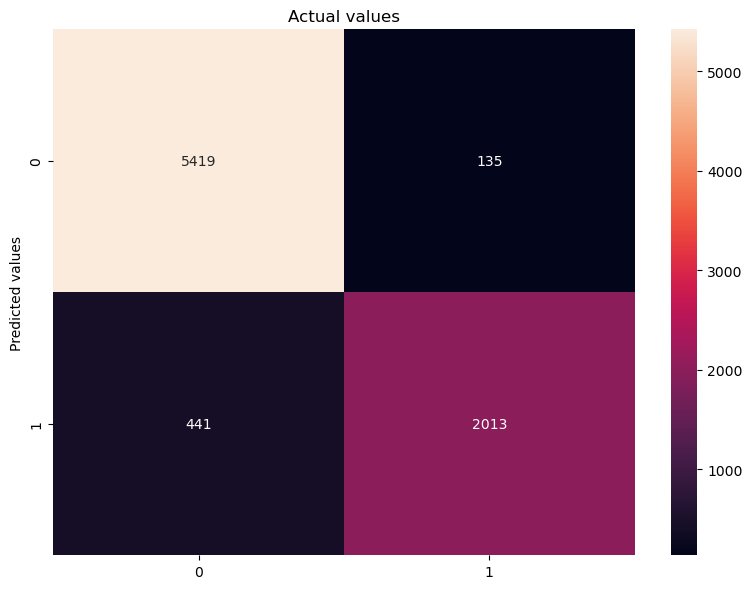

0.9280719280719281
              precision    recall  f1-score   support

       False       0.92      0.98      0.95      5554
        True       0.94      0.82      0.87      2454

    accuracy                           0.93      8008
   macro avg       0.93      0.90      0.91      8008
weighted avg       0.93      0.93      0.93      8008

Accuracy: 0.849 [1]
Accuracy: 0.870 [2]
Accuracy: 0.904 [5]
Accuracy: 0.916 [10]
Accuracy: 0.924 [20]
Accuracy: 0.927 [50]
Accuracy: 0.928 [100]
Accuracy: 0.928 [200]


In [127]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(n_estimators=100,max_features = 0.35, random_state = 4).fit(x_train, y_train)
randomforest_pred = randomforest.predict(x_test)

#Confusion matrix
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test,randomforest_pred),annot = True,  fmt = ".0f")
plt.title("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()
print(accuracy_score(y_test, randomforest_pred))
print(classification_report(y_test, randomforest_pred))

lrf=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(RandomForestClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lrf.append(scores.mean())

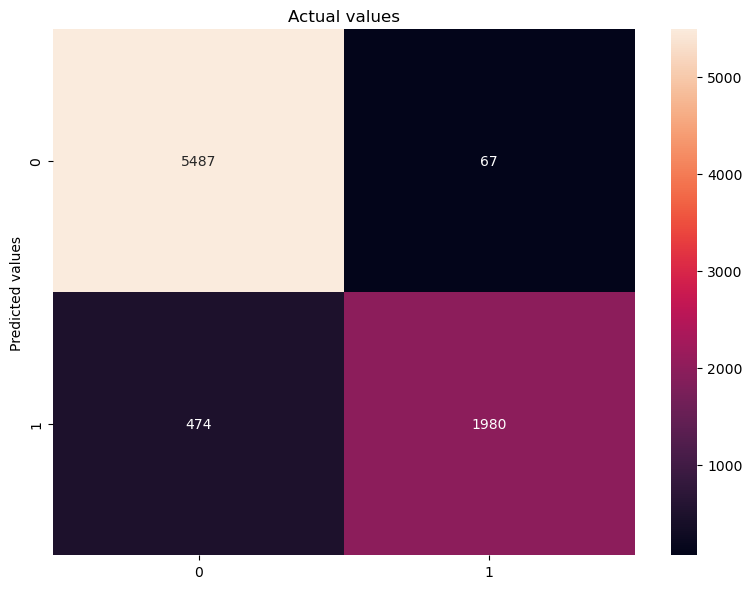

0.9324425574425574
              precision    recall  f1-score   support

       False       0.92      0.99      0.95      5554
        True       0.97      0.81      0.88      2454

    accuracy                           0.93      8008
   macro avg       0.94      0.90      0.92      8008
weighted avg       0.93      0.93      0.93      8008

Accuracy: 0.856 [1]
Accuracy: 0.877 [2]
Accuracy: 0.911 [5]
Accuracy: 0.919 [10]
Accuracy: 0.925 [20]
Accuracy: 0.928 [50]
Accuracy: 0.930 [100]
Accuracy: 0.930 [200]


In [128]:
from sklearn.ensemble import ExtraTreesClassifier

randomforest_extra = ExtraTreesClassifier(n_estimators=100,max_features = 0.35, random_state = 4).fit(x_train, y_train)
randomforest_extra_pred = randomforest_extra.predict(x_test)

#Confusion matrix
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test,randomforest_extra_pred),annot = True,  fmt = ".0f")
plt.title("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()
print(accuracy_score(y_test, randomforest_extra_pred))
print(classification_report(y_test, randomforest_extra_pred))

lext=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(ExtraTreesClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lext.append(scores.mean())

## Boosting

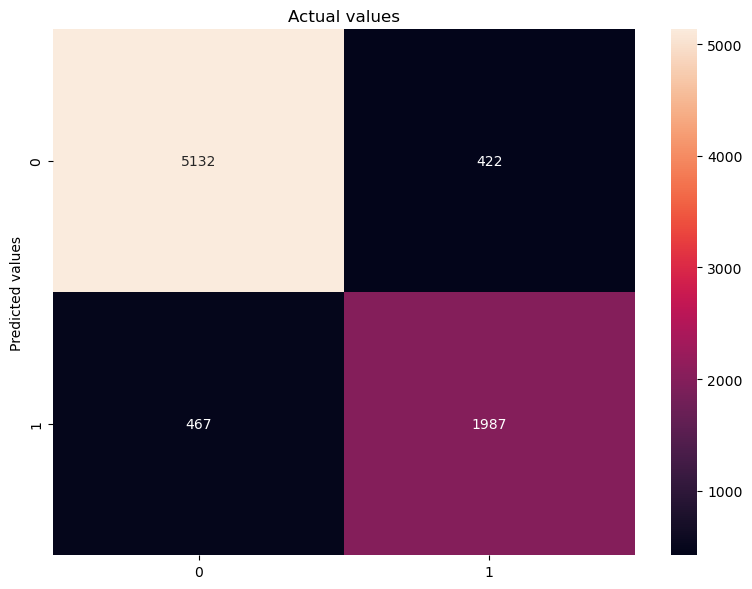

0.888986013986014
              precision    recall  f1-score   support

       False       0.92      0.92      0.92      5554
        True       0.82      0.81      0.82      2454

    accuracy                           0.89      8008
   macro avg       0.87      0.87      0.87      8008
weighted avg       0.89      0.89      0.89      8008

Accuracy: 0.889 [1]
Accuracy: 0.900 [2]
Accuracy: 0.908 [5]
Accuracy: 0.912 [10]
Accuracy: 0.912 [20]
Accuracy: 0.910 [50]
Accuracy: 0.903 [100]


In [129]:
from sklearn.ensemble import AdaBoostClassifier

clf = DecisionTreeClassifier();
adaboost = AdaBoostClassifier(clf, n_estimators=100, random_state=4).fit(x_train, y_train)
adaboost_prediction = adaboost.predict(x_test)

#Confusion matrix
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test,adaboost_prediction),annot = True,  fmt = ".0f")
plt.title("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()
print(accuracy_score(y_test, adaboost_prediction))
print(classification_report(y_test, adaboost_prediction))

lboodt=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lboodt.append(scores.mean())